In [3]:
import dicom2nifti
import os
from glob import glob
import matplotlib.pyplot as plt
import ants

### Upload Images

In [18]:
#we charge the brain atlas on T1 modality
atlas_path_t1 = '/Users/Maxy/Desktop/GBM/Herramienta_CAD/sri24_spm8/templates/T1.nii'
atlas_t1 = ants.image_read(atlas_path_t1, reorient='IAL')

path_t = '/Users/Maxy/Desktop/GBM/Herramienta_CAD/TCGA-GBM/TCGA-02-0006/08-23-1996-MRI BRAIN W WO CONTRAMR-42545/*'
out = '/Users/Maxy/Desktop/GBM/Herramienta_CAD/TCGA-GBM/NIFTI_TEST/Patient_6'
print(glob(path_t)) #this function creates an array whit the paths of the four modalities

for i, modality in enumerate(glob(path_t)): #we save the nifti files 
    
    if i == 0 : 
        dicom2nifti.dicom_series_to_nifti(modality, os.path.join(out, 't1c_test.nii'))
    elif i == 1 : 
        dicom2nifti.dicom_series_to_nifti(modality, os.path.join(out, 't2_test.nii'))
    elif i == 2 :
        dicom2nifti.dicom_series_to_nifti(modality, os.path.join(out, 'flair_test.nii'))
    else :
        dicom2nifti.dicom_series_to_nifti(modality, os.path.join(out, 't1_test.nii'))
path_t1_test = os.path.join(out, 't1_test.nii') #upload the files path
path_t1c_test = os.path.join(out, 't1c_test.nii')
path_t2_test = os.path.join(out, 't2_test.nii')
path_flair_test = os.path.join(out, 'flair_test.nii')

t1_t = ants.image_read(path_t1_test, reorient='IAL')
t1c_t = ants.image_read(path_t1c_test, reorient='IAL')
t2_t = ants.image_read(path_t2_test, reorient='IAL')
flair_t = ants.image_read(path_flair_test, reorient='IAL')

print('t1: ', t1_t)
print('t1c: ', t1c_t)
print('t2:', t2_t)
print('flair: ', flair_t)


['/Users/Maxy/Desktop/GBM/Herramienta_CAD/TCGA-GBM/TCGA-02-0006/08-23-1996-MRI BRAIN W WO CONTRAMR-42545/6-AX T1 POST-26504', '/Users/Maxy/Desktop/GBM/Herramienta_CAD/TCGA-GBM/TCGA-02-0006/08-23-1996-MRI BRAIN W WO CONTRAMR-42545/3-AX T2 FSE-27597', '/Users/Maxy/Desktop/GBM/Herramienta_CAD/TCGA-GBM/TCGA-02-0006/08-23-1996-MRI BRAIN W WO CONTRAMR-42545/4-AX FLAIR-23922', '/Users/Maxy/Desktop/GBM/Herramienta_CAD/TCGA-GBM/TCGA-02-0006/08-23-1996-MRI BRAIN W WO CONTRAMR-42545/5-AX T1-62419']
t1:  ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (23, 256, 256)
	 Spacing    : (6.5, 0.7812, 0.7812)
	 Origin     : (89.2188, -95.8, -62.7)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]

t1c:  ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (23, 256, 256)
	 Spacing    : (6.5, 0.7812, 0.7812)
	 Origin     : (89.2188, -95.8, -62.7)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]

t2: ANTsImage (IAL)
	 Pixel Type : float (float3

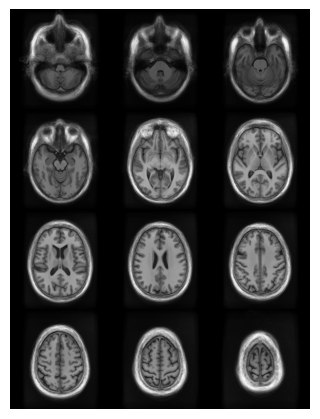

atlas info: ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (155, 240, 240)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (120.0, -110.0, -68.0)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]



In [21]:
ants.plot(atlas_t1, figsize=1, axis=2)
print('atlas info:', atlas_t1)


### Co-Registration

In [22]:
template = t1_t

transformation_t1c = ants.registration(
    fixed=template,
    moving=t1c_t, 
    type_of_transform='Similarity',
    verbose=True
)
transformation_t2 = ants.registration(
    fixed=template,
    moving=t2_t, 
    type_of_transform='Similarity',
    verbose=True
)

transformation_flair = ants.registration(
    fixed=template,
    moving=flair_t, 
    type_of_transform='Similarity',
    verbose=True
)

antsRegistration -d 3 -r [0x7fb63e642330,0x7fb626551440,1] -m mattes[0x7fb63e642330,0x7fb626551440,1,32,regular,0.2] -t Similarity[0.25] -c 2100x1200x1200x10 -s 3x2x1x0 -f 6x4x2x1 -u 1 -z 1 -o [/var/folders/gn/lbvm9zfj74d93lfzhfh2tqj80000gp/T/tmpto2d0i7x,0x7fb62787add0,0x7fb63e672770] -x [NA,NA] --float 1 --write-composite-transform 0 -v 1
All_Command_lines_OK
Using single precision for computations.
The composite transform comprises the following transforms (in order): 
  1. Center of mass alignment using fixed image: 0x7fb63e642330 and moving image: 0x7fb626551440 (type = Euler3DTransform)
  Reading mask(s).
    Registration stage 0
      No fixed mask
      No moving mask
  number of levels = 4
  fixed image: 0x7fb63e642330
  moving image: 0x7fb626551440
Dimension = 3
Number of stages = 1
Use histogram matching = true
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = Mattes
     Fixed image = Image (0x7fb615a041b0)
  RTTI

In [23]:
print('t1c:', transformation_t1c)
print('t2:', transformation_t2)
print('flair:', transformation_flair)

t1c: {'warpedmovout': ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (23, 256, 256)
	 Spacing    : (6.5, 0.7812, 0.7812)
	 Origin     : (89.2188, -95.8, -62.7)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]
, 'warpedfixout': ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (23, 256, 256)
	 Spacing    : (6.5, 0.7812, 0.7812)
	 Origin     : (89.2188, -95.8, -62.7)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]
, 'fwdtransforms': ['/var/folders/gn/lbvm9zfj74d93lfzhfh2tqj80000gp/T/tmpto2d0i7x0GenericAffine.mat'], 'invtransforms': ['/var/folders/gn/lbvm9zfj74d93lfzhfh2tqj80000gp/T/tmpto2d0i7x0GenericAffine.mat']}
t2: {'warpedmovout': ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (23, 256, 256)
	 Spacing    : (6.5, 0.7812, 0.7812)
	 Origin     : (89.2188, -95.8, -62.7)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]
, 'warpedfixout': ANTsImage (IAL)
	 Pixel Type : float (float32)
	

In [24]:
t1c_reg= transformation_t1c['warpedmovout']
t2_reg = transformation_t2['warpedmovout']
flair_reg = transformation_flair['warpedmovout']

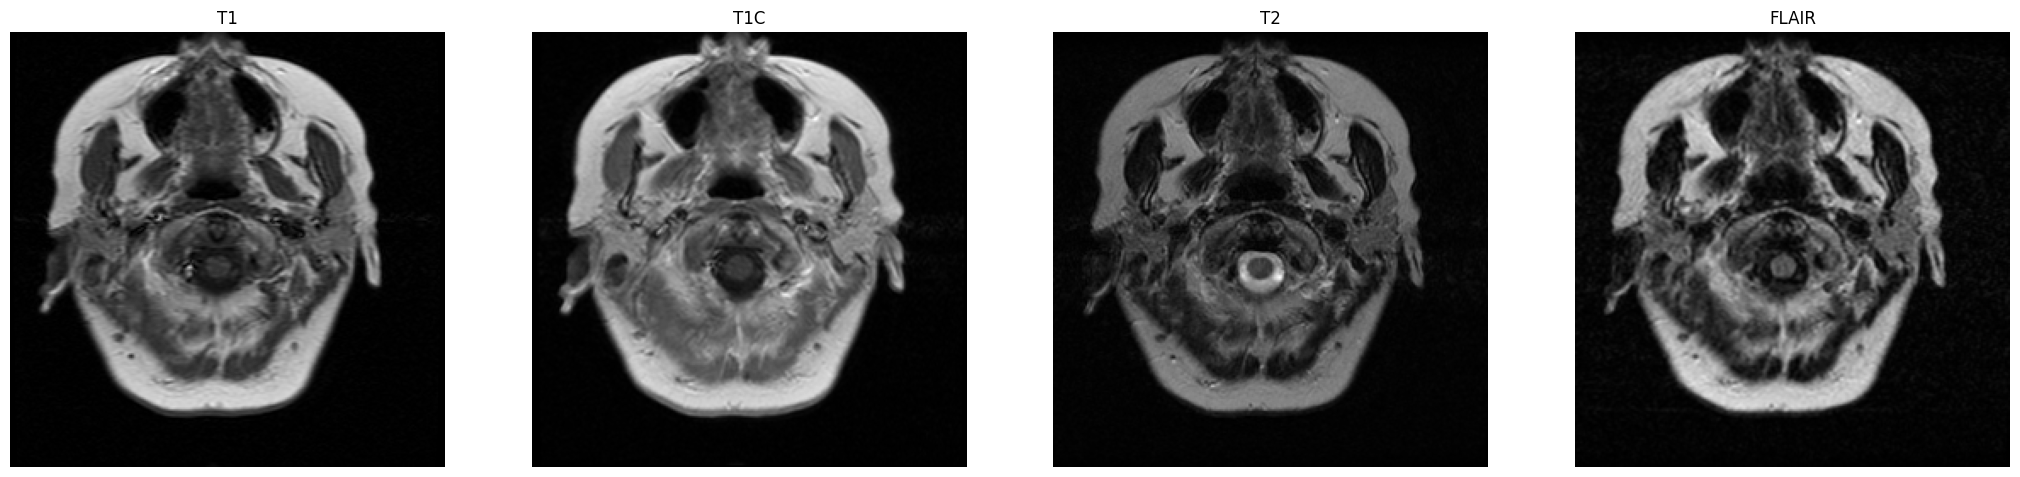

In [66]:
f1, axs1 = plt.subplots(1, 4, figsize=(10, 10))

for i, (img, title) in enumerate(zip([t1_t, t1c_reg, t2_reg, flair_reg], ['T1', 'T1C', 'T2', 'FLAIR'])):
    plt.subplot(1, 4, i + 1)
    plt.title(title)
    plt.imshow(img[:][:][0], cmap='gray')
    plt.axis('off')

# Eliminar fondo blanco
plt.subplots_adjust(left=0, right=2, top=2, bottom=0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.show()

### Brats space transform

In [26]:
#Now we pass T1 trough a brain atlas from SRI24 format 
transformation_brats_space = ants.registration(
    fixed=atlas_t1,
    moving=t1_t, 
    type_of_transform='SyN',
    verbose=True
)

antsRegistration -d 3 -r [0x7fb63a06ae20,0x7fb615a040d0,1] -m mattes[0x7fb63a06ae20,0x7fb615a040d0,1,32,regular,0.2] -t Affine[0.25] -c 2100x1200x1200x0 -s 3x2x1x0 -f 4x2x2x1 -x [NA,NA] -m mattes[0x7fb63a06ae20,0x7fb615a040d0,1,32] -t SyN[0.200000,3.000000,0.000000] -c [40x20x0,1e-7,8] -s 2x1x0 -f 4x2x1 -u 1 -z 1 -o [/var/folders/gn/lbvm9zfj74d93lfzhfh2tqj80000gp/T/tmp6vs_hiyg,0x7fb63e6515f0,0x7fb625126300] -x [NA,NA] --float 1 --write-composite-transform 0 -v 1
All_Command_lines_OK
Using single precision for computations.
The composite transform comprises the following transforms (in order): 
  1. Center of mass alignment using fixed image: 0x7fb63a06ae20 and moving image: 0x7fb615a040d0 (type = Euler3DTransform)
  Reading mask(s).
    Registration stage 0
      No fixed mask
      No moving mask
    Registration stage 1
      No fixed mask
      No moving mask
  number of levels = 4
  number of levels = 3
  fixed image: 0x7fb63a06ae20
  moving image: 0x7fb615a040d0
  fixed image: 0x7

In [27]:
print('new transformation:', transformation_brats_space)

new transformation: {'warpedmovout': ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (155, 240, 240)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (120.0, -110.0, -68.0)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]
, 'warpedfixout': ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (23, 256, 256)
	 Spacing    : (6.5, 0.7812, 0.7812)
	 Origin     : (89.2188, -95.8, -62.7)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]
, 'fwdtransforms': ['/var/folders/gn/lbvm9zfj74d93lfzhfh2tqj80000gp/T/tmp6vs_hiyg1Warp.nii.gz', '/var/folders/gn/lbvm9zfj74d93lfzhfh2tqj80000gp/T/tmp6vs_hiyg0GenericAffine.mat'], 'invtransforms': ['/var/folders/gn/lbvm9zfj74d93lfzhfh2tqj80000gp/T/tmp6vs_hiyg0GenericAffine.mat', '/var/folders/gn/lbvm9zfj74d93lfzhfh2tqj80000gp/T/tmp6vs_hiyg1InverseWarp.nii.gz']}


In [28]:
t1_res = transformation_brats_space['warpedmovout']


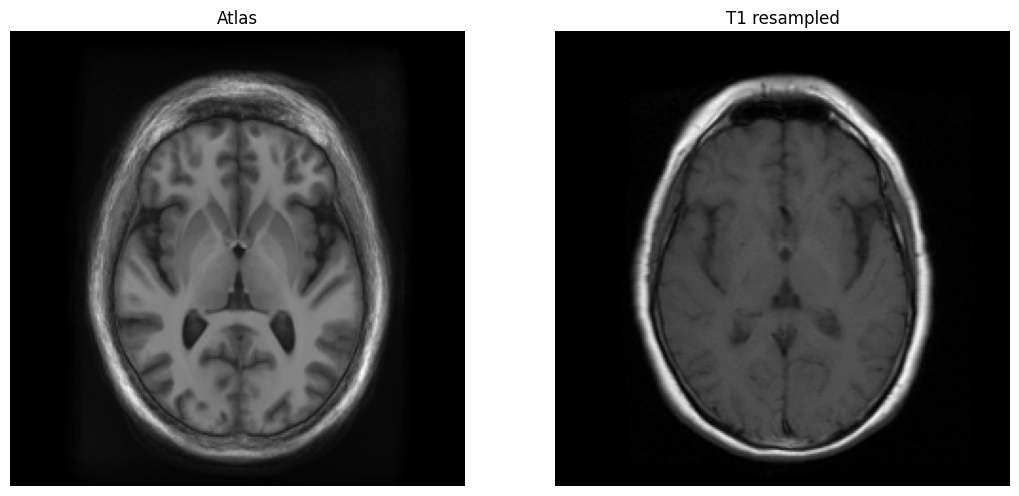

In [72]:
f1, axs1 = plt.subplots(1, 2, figsize=(10, 5))
images = [atlas_t1, t1_res]
titles = ['Atlas', 'T1 resampled']

for i, (img, title) in enumerate(zip(images, titles)):
    axs1[i].imshow(img[70, :, :], cmap='gray')  
    axs1[i].set_title(title)
    axs1[i].axis('off')

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
for ax in axs1:
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

plt.show()

In [33]:
print("Ruta de archivo de transformación:", transformation_brats_space)

Ruta de archivo de transformación: {'warpedmovout': ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (155, 240, 240)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (120.0, -110.0, -68.0)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]
, 'warpedfixout': ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (23, 256, 256)
	 Spacing    : (6.5, 0.7812, 0.7812)
	 Origin     : (89.2188, -95.8, -62.7)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]
, 'fwdtransforms': ['/var/folders/gn/lbvm9zfj74d93lfzhfh2tqj80000gp/T/tmp6vs_hiyg1Warp.nii.gz', '/var/folders/gn/lbvm9zfj74d93lfzhfh2tqj80000gp/T/tmp6vs_hiyg0GenericAffine.mat'], 'invtransforms': ['/var/folders/gn/lbvm9zfj74d93lfzhfh2tqj80000gp/T/tmp6vs_hiyg0GenericAffine.mat', '/var/folders/gn/lbvm9zfj74d93lfzhfh2tqj80000gp/T/tmp6vs_hiyg1InverseWarp.nii.gz']}


In [45]:
transform_paths = [transformation_brats_space['fwdtransforms'][0], transformation_brats_space['fwdtransforms'][1]]

# List of imagees to transform
images_to_transform = [t2_reg, t1c_reg, flair_reg]
# empty array
transformed_images = []

# Aplicar la transformación a cada imagen con interpolador nearestNeighbor

for moving_image in images_to_transform:
    transformed_image = ants.apply_transforms(
        fixed=atlas_t1,  # must be atlas
        moving=moving_image,
        transformlist=transform_paths,
        interpolator='linear',  # Using nearestNeighbour to preserve intensities
        imagetype=0,  
        verbose=True
    )
    transformed_images.append(transformed_image)

# transform_images now contains the transformed versions of t2, t1c, flair
# we can access them using transformed_images[0], transformed_images[1], transformed_images[2]

['-d', '3', '-i', '0x7fb6273b28d0', '-o', '0x7fb62858e670', '-r', '0x7fb6273f3050', '-n', 'linear', '-t', '/var/folders/gn/lbvm9zfj74d93lfzhfh2tqj80000gp/T/tmp6vs_hiyg1Warp.nii.gz', '-t', '/var/folders/gn/lbvm9zfj74d93lfzhfh2tqj80000gp/T/tmp6vs_hiyg0GenericAffine.mat']
Using single precision for computations.
Input scalar image: 0x7fb6273b28d0
Reference image: 0x7fb6273f3050
The composite transform comprises the following transforms (in order): 
  1. /var/folders/gn/lbvm9zfj74d93lfzhfh2tqj80000gp/T/tmp6vs_hiyg0GenericAffine.mat (type = AffineTransform)
  2. /var/folders/gn/lbvm9zfj74d93lfzhfh2tqj80000gp/T/tmp6vs_hiyg1Warp.nii.gz (type = DisplacementFieldTransform)
Default pixel value: 0
Interpolation type: LinearInterpolateImageFunction
Output warped image: 0x7fb62858e670
['-d', '3', '-i', '0x7fb6260ef740', '-o', '0x7fb628582ba0', '-r', '0x7fb6260ed3c0', '-n', 'linear', '-t', '/var/folders/gn/lbvm9zfj74d93lfzhfh2tqj80000gp/T/tmp6vs_hiyg1Warp.nii.gz', '-t', '/var/folders/gn/lbvm9zfj74d9

t1:  ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (155, 240, 240)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (120.0, -110.0, -68.0)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]

t1c:  ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (155, 240, 240)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (120.0, -110.0, -68.0)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]

t2: ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (155, 240, 240)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (120.0, -110.0, -68.0)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]

flair:  ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (155, 240, 240)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (120.0, -110.0, -68.0)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]



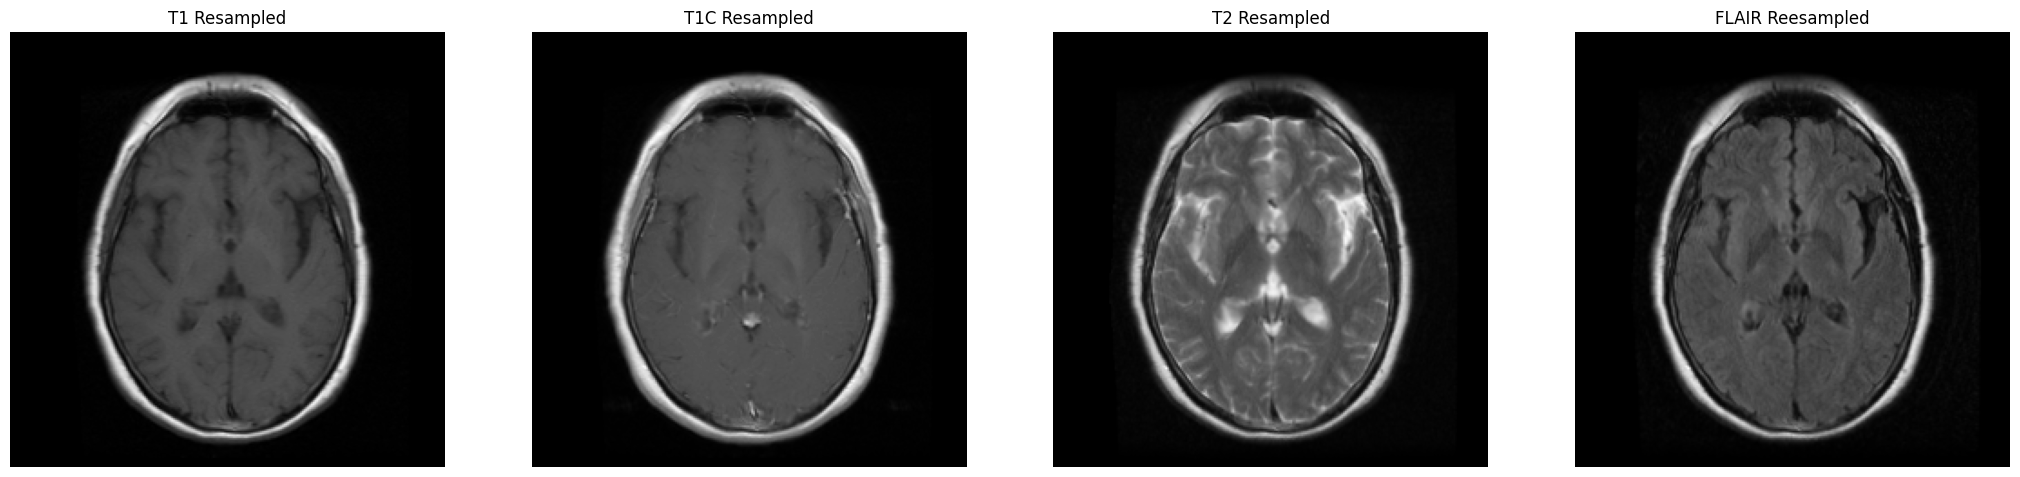

In [73]:
t2_res = transformed_images[0]
t1c_res = transformed_images[1]
flair_res = transformed_images[2]

print('t1: ', t1_res)
print('t1c: ', t1c_res)
print('t2:', t2_res)
print('flair: ', flair_res)

f1, axs1 = plt.subplots(1, 4, figsize=(10, 10))

for i, (img, title) in enumerate(zip([t1_res, t1c_res, t2_res, flair_res], ['T1 Resampled', 'T1C Resampled', 'T2 Resampled', 'FLAIR Reesampled'])):
    plt.subplot(1, 4, i + 1)
    plt.title(title)
    plt.imshow(img[:][:][70], cmap='gray')
    plt.axis('off')

# Eliminar fondo blanco
plt.subplots_adjust(left=0, right=2, top=2, bottom=0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.show()

### Brain Extraction 

In [61]:
from antspynet.utilities import brain_extraction
prob_brain_mask = brain_extraction(t1_res, modality="t1", verbose=True,)


2024-02-16 18:00:14.314259: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/Maxy/Desktop/GBM/Herramienta_CAD/.venv/lib/python3.9/site-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/Maxy/Desktop/GBM/Herramienta_CAD/.venv/lib/python3.9/site-packages/tensorflow_probability/python/__init__.py:58: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



Brain extraction:  retrieving model weights.
Brain extraction:  retrieving template.
Brain extraction:  normalizing image to the template.
Brain extraction:  prediction and decoding.
1/1 [==============================] - 5s 5s/step
Brain extraction:  renormalize probability mask to native space.


ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (155, 240, 240)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (120.0, -110.0, -68.0)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]



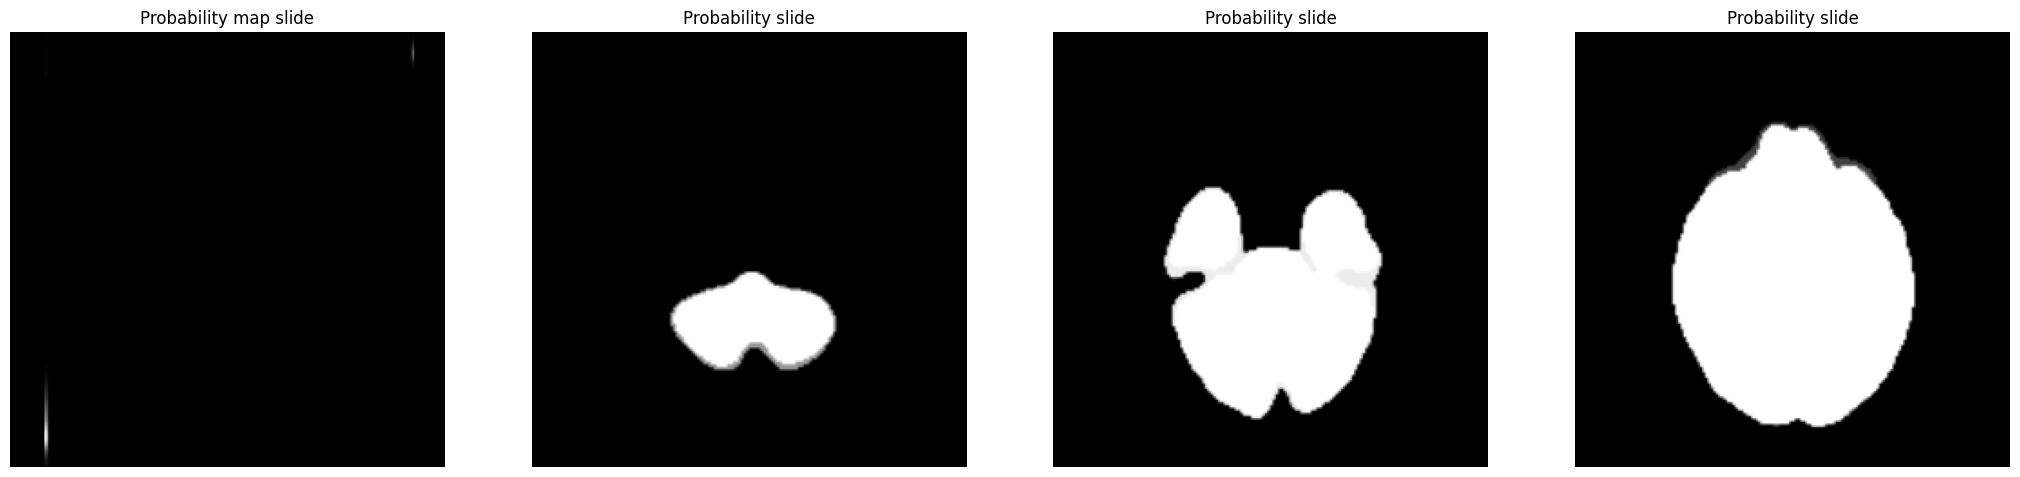

In [62]:
print(prob_brain_mask)

f1, axs1 = plt.subplots(1, 4, figsize=(10, 10))

for i, (title) in enumerate( ['Probability map slide', 'Probability slide', 'Probability slide', 'Probability slide']):
    plt.subplot(1, 4, i + 1)
    plt.title(title)
    plt.imshow(prob_brain_mask[i*20][:][:], cmap='gray')
    plt.axis('off')

# Eliminar fondo blanco
plt.subplots_adjust(left=0, right=2, top=2, bottom=0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.show()

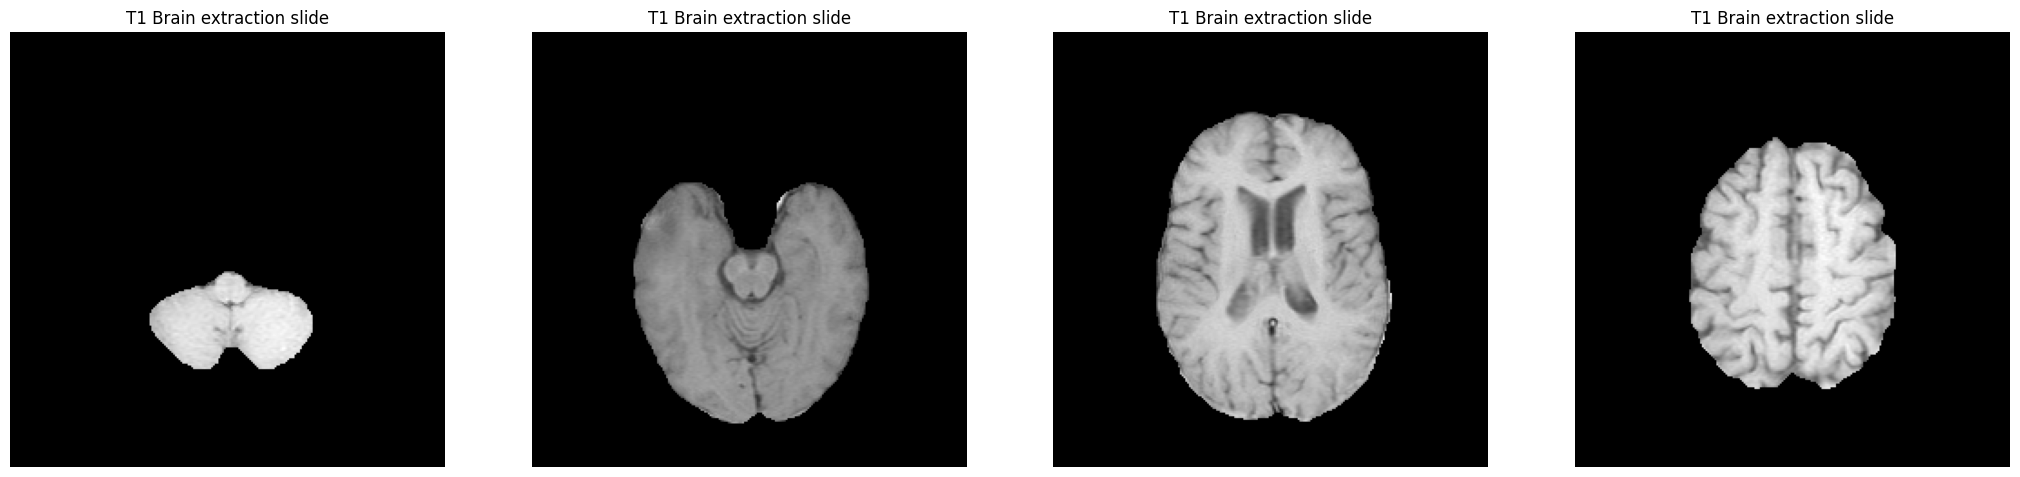

In [76]:
brain_mask_t1 = ants.get_mask(prob_brain_mask, low_thresh=0.5)

masked_t1 = ants.mask_image(t1_res, brain_mask_t1)

f1, axs1 = plt.subplots(1, 4, figsize=(10, 10))

for i, (title) in enumerate( ['T1 Brain extraction slide', 'T1 Brain extraction slide', 'T1 Brain extraction slide', 'T1 Brain extraction slide']):
    plt.subplot(1, 4, i + 1)
    plt.title(title)
    plt.imshow(masked_t1[i*30+20][:][:], cmap='gray')
    plt.axis('off')

# Eliminar fondo blanco
plt.subplots_adjust(left=0, right=2, top=2, bottom=0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.show()

In [77]:
masked_t1c = ants.mask_image(t1c_res, brain_mask_t1)
masked_t2 = ants.mask_image(t2_res, brain_mask_t1)
masked_flair = ants.mask_image(flair_res, brain_mask_t1)

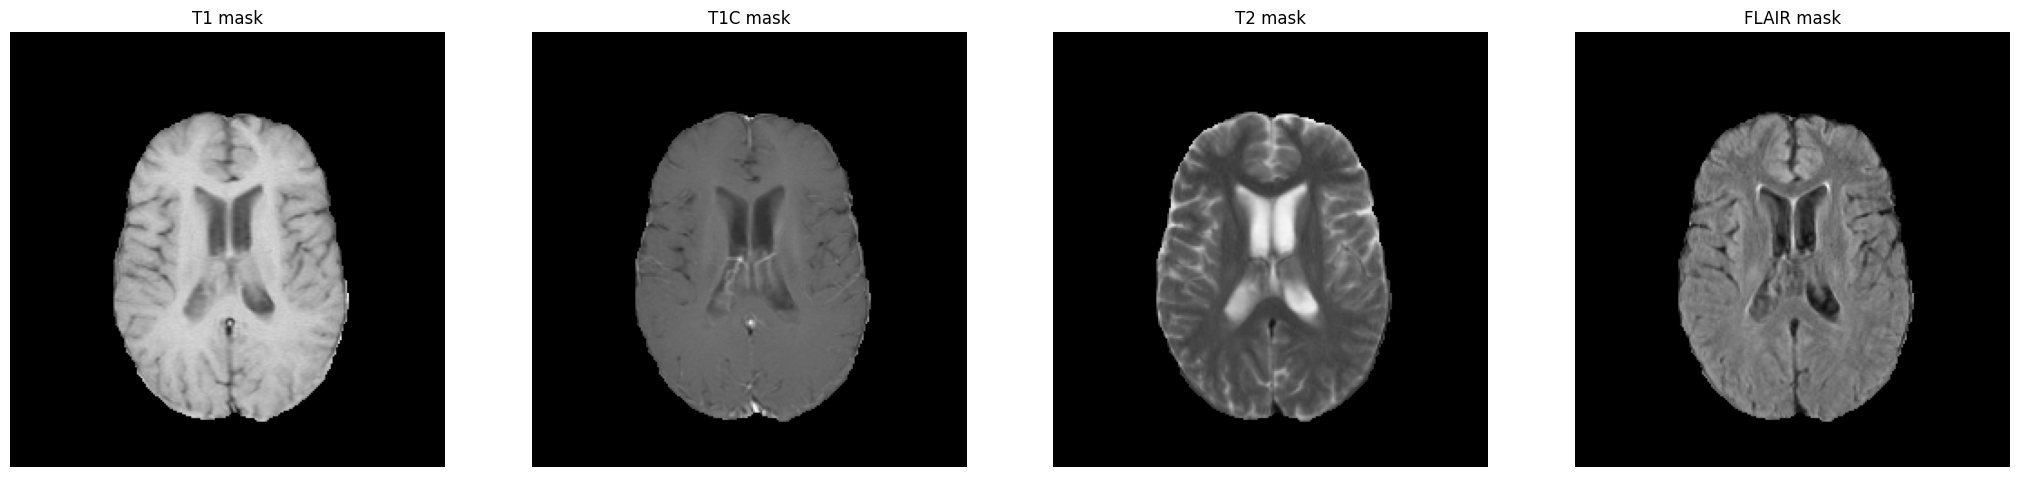

In [78]:
f1, axs1 = plt.subplots(1, 4, figsize=(10, 10))

for i, (img, title) in enumerate(zip([masked_t1, masked_t1c, masked_t2, masked_flair], ['T1 mask', 'T1C mask', 'T2 mask', 'FLAIR mask'])):
    plt.subplot(1, 4, i + 1)
    plt.title(title)
    plt.imshow(img[:][:][80], cmap='gray')
    plt.axis('off')

# Eliminar fondo blanco
plt.subplots_adjust(left=0, right=2, top=2, bottom=0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.show()

In [109]:
import nibabel as nib
from tempfile import mkstemp
# Ruta de destino para guardar el archivo NIfTI
ruta_destino = '/Users/Maxy/Desktop/GBM/Herramienta_CAD/sri24_spm8/Github'

# Guardar el archivo NIfTI en la ruta especificada
fd, tmpfile = mkstemp(suffix=".nii.gz")
masked_t1.to_filename(tmpfile)
new_img = nib.load(tmpfile)
os.close(fd)

In [110]:
nib.save(new_img,ruta_destino)

In [86]:
import pandas as pd

path_control = '/Users/Maxy/Desktop/GBM/Herramienta_CAD/Pre-operative_TCGA_GBM_NIfTI_and_Segmentations/TCGA-02-0006/TCGA-02-0006_1996.08.23_t1.nii.gz'
control = ants.image_read(path_control, reorient='IAL')
masked_t1.set_origin((239,-239,0))
print(masked_t1)
print(control)



ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (155, 240, 240)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (239.0, -239.0, 0.0)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]

ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (155, 240, 240)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (239.0, -239.0, 0.0)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]



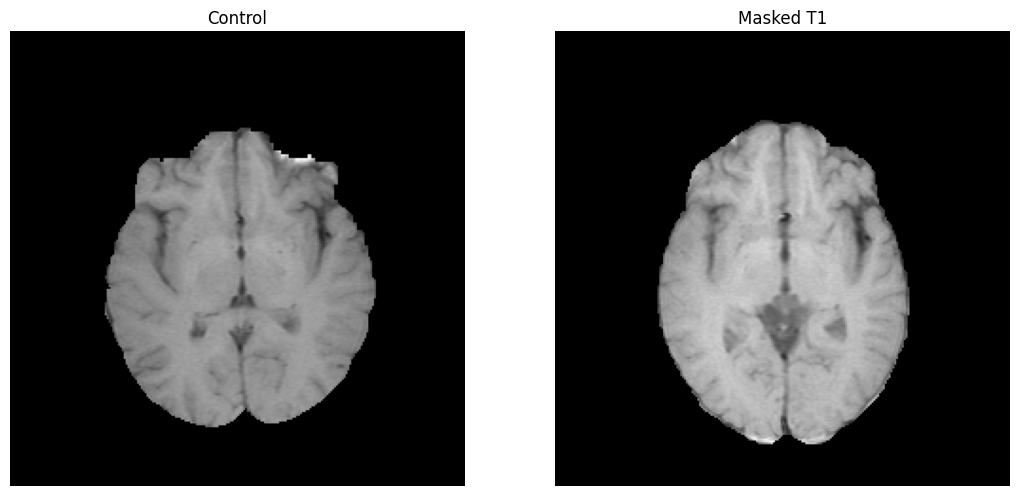

In [105]:
f1, axs1 = plt.subplots(1, 2, figsize=(10, 5))
images = [control, masked_t1]
titles = ['Control', 'Masked T1']

for i, (img, title) in enumerate(zip(images, titles)):
    axs1[i].imshow(img[65, :, :], cmap='gray')  
    axs1[i].set_title(title)
    axs1[i].axis('off')

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
for ax in axs1:
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

plt.show()

In [85]:
results

1575.520751953125